# Latar Belakang
Transportation Security Administration (TSA) adalah sebuah badan/agensi bagian dari Departement Homeland Security yang bertanggung jawab untuk keamanan dan keselamatan transportasi untuk bandara domestik maupun internasional di Amerika Serikat. TSA dibentuk sebagai respons terhadap peristiwa 9/11 di Amerika Serikat pada tahun 2001. TSA bertugas memeriksa penumpang dan bagasi di seluruh bandara di Amerika Serikat. Oleh karena itu, TSA mencatat setiap klaim yang diajukan oleh para pengguna moda transportasi tersebut. Berikut ini Informasi yang terlampir tentang klaim kerugian yang diajukan oleh penumpang kepada TSA terkait dengan barang-barang pribadi mereka yang hilang, rusak atau dicuri selama proses pemeriksaan keamanan di bandara. 

# Pernyataan Masalah
Dengan adanya data klaim tersebut TSA ingin mengetahui bandara mana saja yang memiliki jumlah pengajuan klaim terbanyak. Informasi ini dapat membantu TSA dalam mengerucutkan bandara-bandara mana saja yang membutuhkan peningkatan kinerja sistem keamanannya, sehingga dapat mengurangi frekuensi klaim yang diajukan kepada TSA.

Adapun pertanyaan yang menjadi dasar untuk menjawab masalah diatas yaitu :

**Bagaimana karakteristik data pengajuan klaim yang dibuat oleh penumpang ke pihak TSA ?**

Berikut ini adalah pertanyaan untuk mendeskripsikan 
* Bandara mana saja yang menerima klaim paling banyak?
* Tipe Klaim apa yang paling sering diajukan oleh penumpang?
* Dimana saja lokasi yang paling sering terjadi pelaporan klaim tersebut?
* Bagaimana grafik total Klaim dari tahun 2002-2015?

## Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data klaim yang diajukan ke TSA pada periode waktu 2002-2015. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database).

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import re

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait Klaim TSA dari tahun 2002 sampai 2015, yaitu:  

* Claim Number : ID unik untuk tiap aduan/klaim
* Date Received : Tanggal TSA menerima aduan/klaim
* Incident Date : Tangga terjadinya kasus/perkara menurut pelapor
* Airport Code : ID unik bandara tempat terjadinya klaim
* Airport Name : Nama Bandara tempat terjadinya klaim
* Airline Name : Nama maskapai udara yang digunakan oleh pelapor
* Claim Type : Tipe klaim yang diajukan
* Claim Site : Lokasi pelapor mengajukan klaim
* Item : Jenis barang yang dilaporkan oleh pelapor
* Claim Amount : Nominal biaya ganti rugi yang diajukan oleh pelapor (dalam dollar AS)
* Status : Status laporan klaim setelah diterima dan diproses oleh TSA
* Close Amount : Nominal biaya ganti rugi yang dibayarkan oleh TSA kepada pelapor (dalam dollar AS)
* Disposition : Status akhir (final) dari laporan klaim.


Berikut 5 baris teratas dan terbawah dari dataset tsa_claims.

In [67]:
df=pd.read_csv('tsa_claims.csv')
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [68]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (204267, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [69]:
# Mengecek jumlah value kosong di setiap kolom
df.isna().sum()

Claim Number     0    
Date Received    263  
Incident Date    2183 
Airport Code     8524 
Airport Name     8524 
Airline Name     34374
Claim Type       7913 
Claim Site       740  
Item             3966 
Claim Amount     4043 
Status           5    
Close Amount     68952
Disposition      72908
dtype: int64

In [70]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [71]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Data'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Claim Number   204258             
1   Date Received  4007               
2   Incident Date  26807              
3   Airport Code   465                
4   Airport Name   485                
5   Airline Name   318                
6   Claim Type     11                 
7   Claim Site     6                  
8   Item           4704               
9   Claim Amount   36117              
10  Status         15                 
11  Close Amount   17162              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   


Dari informasi di atas, kita dapat mengambil beberapa insight awal:

* Dataset tsa_claims memiliki 204.267 baris dan 13 kolom
* Semua kolom kecuali kolom `Claim Number` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* Kolom `Claim Number` berisikan ID unik untuk setiap Claim, oleh karena itu tidak relevan dalam analisis dan pengolahan data, sehingga dapat dihapus.
* Kolom `Date Received` dan `Incident Date` memiliki tipe data object. Namun dari value didalamnya, kolom ini seharusnya berisikan data DateTime, karena terkait dengan waktu.
* Kolom `Claim Amount` dan `Close Amount` memiliki tipe data object. Namun kolom ini tidak relevan dalam proses analisis, sehingga dapat dihapus.
* Kolom `Airport Code` dan `Airport Name` memiliki missing data yang sama. Bisa kita isi bersamaan dengan value yang sama juga.
* Kolom `Airline Name` harus dilakukan pengecekkan lebih lanjut, karena ada beberapa value yang memiliki kemiripan dalam penulisan.
* Kolom `Item` berisikan barang-barang yang dilaporkan oleh pelapor, namun kolom ini tidak relevan untuk tujuan analisis kita, oleh karena itu dapat dihapus.
* Kolom `Status` dan `Disposition` berisikan data status proses dari pengajuan klaim tersebut. Oleh karena itu kedua kolom ini tidak relevan dalam analisa, sehingga dapat dihapus.

### Missing Value

In [72]:
# persentase missing value di tiap kolom

df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.128753 
Incident Date    1.068699 
Airport Code     4.172970 
Airport Name     4.172970 
Airline Name     16.827975
Claim Type       3.873851 
Claim Site       0.362271 
Item             1.941576 
Claim Amount     1.979272 
Status           0.002448 
Close Amount     33.755820
Disposition      35.692501
dtype: float64

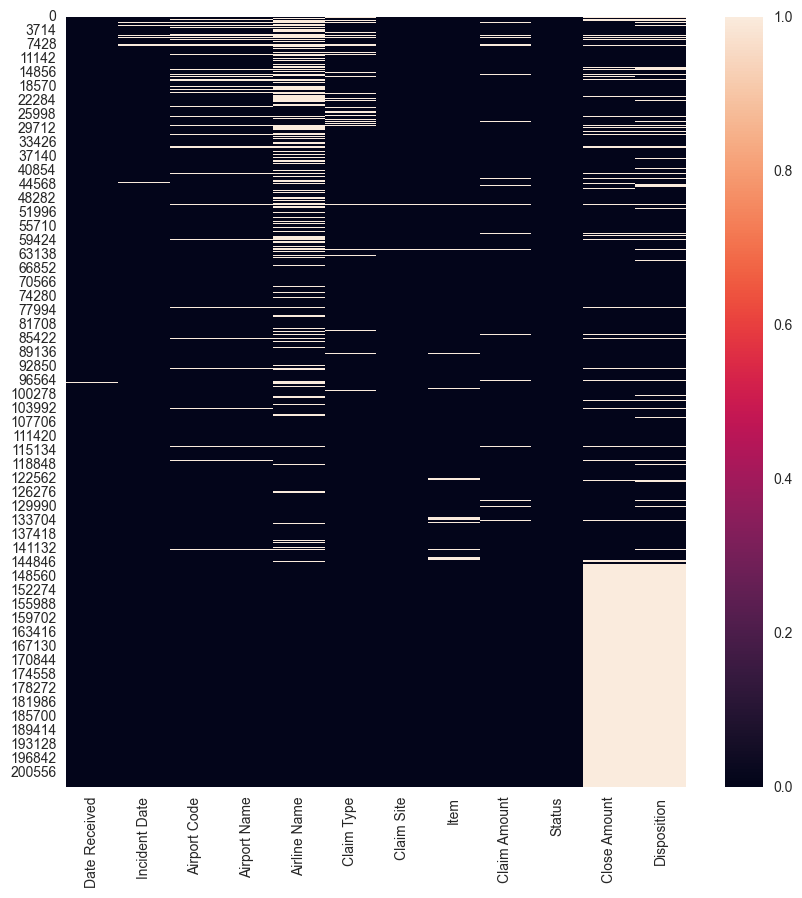

In [73]:
# Sebaran missing value di dalam dataset tsa_claims

plt.figure(figsize=(10,10))
sns.heatmap(df[['Date Received','Incident Date','Airport Code','Airport Name',
'Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status',
'Close Amount','Disposition']].isna());

Dari informasi persentase missing value dan tampilan heatmap di atas, secara garis besar yaitu:

* Missing Value di kolom `Airline Name`, `Close Amount`, dan `Disposition` memiliki proporsi yang cukup besar (>15%), di mana kolom `Disposition` menjadi yang terbesar dengan persentase Missing Value mencapai 35,6%.
* Namun karena data kolom `Close Amount` dan `Disposition` tidak relevan dengan tujuan dari analisis kita, maka kita bisa menghapus kedua kolom tersebut.

Ada 2 opsi yang dapat dilakukan untuk menangani Missing Value:

* pertama dengan menghapus baris atau kolom yang berisi Missing Value.
* kedua dengan mengisi data yang hilang. Cara ini lebih diutamakan dalam kasus ini. Beberapa metode bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi value yang hilang dengan value yang sebenarnya, atau sedekat mungkin nilai asli. Jika masih ada data yang tidak terisi, kita bisa menggunakan angka mean, median, atau modus. Menghapus akan menjadi pilihan terakhir.



#### `Airport Code` dan `Airport Name`

Mengecek lalu menghapus/mengganti multiple values di kolom `Airport Name` yang berhubungan dengan satu value yang sama pada kolom `Airport Code`


In [74]:
temp = df.groupby("Airport Code")['Airport Name'].nunique().sort_values(ascending=False)
print(df[df['Airport Code'].isin(temp[temp>1].index)].groupby("Airport Code")['Airport Name'].unique())
print(len(df[df['Airport Code'].isin(temp[temp>1].index)].groupby("Airport Code")['Airport Name'].unique()))

Airport Code
BOS    [Boston (Logan) International Airport, Boston (Logan) International Airport ]      
BUR    [Bob Hope, Bob Hope ]                                                              
BZN    [Gallatin Field, Bozeman Yellowstone International Airport]                        
DEN    [Denver International Airport, Denver International Airport ]                      
DFW    [Dallas-Fort Worth International Airport, Dallas-Fort Worth International Airport ]
DUJ    [Dubois Jefferson County, Dubois Jefferson County ]                                
EAR    [Kearney Municipal Airport, Kearney Municipal Airport ]                            
HIB    [Chisolm-Hibbing Municipal, Chisolm-Hibbing Municipal ]                            
INL    [Falls International, Falls International ]                                        
JHM    [Kapalua Airport, Kapalua Airport ]                                                
LAX    [Los Angeles International Airport, Los Angeles International Airport 

Dari pengecekkan data di atas, dapat dilihat terdapat 20 value `Airport Code` yang memiliki value `Airport Name` lebih dari satu. Sedangkan seharusnya `Airport Code` menjadi ID unik hanya untuk satu `Airport Name`. Hal ini disebabkan karena adanya spasi berlebih pada value di `Airport Name`. kecuali pada Code **PNS** yang disebabkan karena memiliki penulisan value yang berbeda. Kita akan menghilangkan spasi berlebih untuk 19 `Airport Name` dan memilih salah satu penulisan value untuk Code **PNS**

In [75]:
# Menghilangkan spasi berlebih dan memilih satu value Airport Name untuk mewakili Airport Code PNS
df['Airport Code'] = df['Airport Code'].str.strip()
df['Airport Name'] = df['Airport Name'].str.strip()
df['Airport Name'] = df['Airport Name'].replace(to_replace= 'Pensacola Regional', value='Pensacola International Airport')

#### `Airline Name`
Mengecek lebih detail dan mengganti/menyesuaikan beberapa value yang terlihat seperti nama anak/induk perusahaan dan penulisan yang tidak konsisten.

In [76]:
df['Airline Name'] = df['Airline Name'].str.strip().str.replace(' ','')
df['Airline Name'].replace('AmericanEagle','AmericanAirlines',inplace=True)
df['Airline Name'].replace('AmericanWest','AmericaWest',inplace=True)
df['Airline Name'].replace('AirTranAirlines(donotuse)','AirTranAirlines',inplace=True)
df['Airline Name'].replace('AeroflotRussianInternational','AeroFlot',inplace=True)
df['Airline Name'].replace('ContinentalExpressInc','ContinentalAirlines',inplace=True)
df['Airline Name'].replace('Delta(Song)','DeltaAirLines',inplace=True)
df['Airline Name'].replace('FrontierAviationInc','FrontierAirlines',inplace=True)
df['Airline Name'].replace('NorthwestInternationalAirwaysLtd','NorthwestAirlines',inplace=True)
df['Airline Name'].replace('SkywestAirlinesAustralia','SkywestAirlinesIncUSA',inplace=True)



#### `Date Received` dan `Incident Date`

Seluruh kolom di atas masih memiliki tipe data object, namun tipe data tersebut tidak sesuai dengan penjelasan value yang terkandung di dalamnya. Oleh karena itu kita akan merubah tipe data setiap kolom tersebut agar sesuai dengan valuenya.


In [77]:
# Mengubah tipe data yang berkaitan dengan tanggal menjadi DateTime

df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')
df['Date Received'] = pd.to_datetime(df['Date Received'], errors='coerce')

Pada kolom `Incident Date` terdapat error pada penulisan beberapa value nya sehingga tipe datanya tidak dapat diubah. Kita tidak bisa mengganti/mengisi value tersebut dengan value karena berkaitan dengan waktu yang spesifik.

In [78]:
df['Date Received'].dt.year.value_counts().sort_index()

1994.0    1    
1996.0    1    
2000.0    4    
2002.0    1054 
2003.0    22474
2004.0    29786
2005.0    24548
2006.0    19093
2007.0    18672
2008.0    16440
2009.0    12803
2010.0    10925
2011.0    10905
2012.0    10069
2013.0    9698 
2014.0    8855 
2015.0    8667 
2020.0    1    
2025.0    5    
2040.0    1    
2044.0    1    
2055.0    1    
Name: Date Received, dtype: int64

In [79]:
df['Incident Date'].dt.year.value_counts().sort_index()

1996.0    1    
2000.0    14   
2001.0    15   
2002.0    2156 
2003.0    24508
2004.0    28960
2005.0    22965
2006.0    18806
2007.0    18270
2008.0    15902
2009.0    11179
2010.0    12215
2011.0    10995
2012.0    9997 
2013.0    9536 
2014.0    8680 
2015.0    7721 
Name: Incident Date, dtype: int64

Dari pengecekkan di atas ditemukan bahwa terdapat value yang memiliki penanggalan (tahun) tidak sesuai dengan pernyataan rentang tahun di dataset (2002-2015). Oleh karena itu kita akan menghapus value penanggalan (tahun) yang tidak sesuai tersebut, langkah ini dapat diambil karena proporsi value keliru tersebut termasuk sangat rendah dan tidak ada cara yang dianggap cukup sesuai untuk mengganti value tersebut.

In [80]:
# Mengatur rentang tahun data yang digunakan sesuai dengan informasi tentang rentang tahun di dataset yaitu (2002-2015)

df = df[df['Date Received'].dt.year.isin(range(2002,2015+1))]
df = df[df['Incident Date'].dt.year.isin(range(2002,2015+1))]

Setelah dicek ternyata terdapat keanehan pada beberapa value dalam kolom `Received Date` yang berisi waktu TSA menerima pengaduan **Claim** dan kolom `Incident Date` yang berisi waktu terjadinya kasus. Tidak masuk akal bila value dalam `Incident Date` lebih baru dibanding value dalam `Received Date` (dengan kata lain tidak mungkin kejadian baru terjadi setelah pelaporan). Oleh karena itu kita akan menghapus data yang aneh tersebut.

In [81]:
# Menghapus setiap index data dengan kondisi waktu 'Incident Date' lebih baru dibanding waktu 'Date Received'

indeks = df[df['Incident Date'] > df['Date Received']].index
df.drop(index=indeks, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),$16.71,Approved,$17.00,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,$450.00,Canceled,NaN,NaN


In [82]:
df.shape

(200026, 13)

In [83]:
df.isna().sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     6940 
Airport Name     6940 
Airline Name     32028
Claim Type       6327 
Claim Site       515  
Item             3683 
Claim Amount     2501 
Status           0    
Close Amount     67345
Disposition      71011
dtype: int64

In [84]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.000000 
Incident Date    0.000000 
Airport Code     3.469549 
Airport Name     3.469549 
Airline Name     16.011918
Claim Type       3.163089 
Claim Site       0.257467 
Item             1.841261 
Claim Amount     1.250337 
Status           0.000000 
Close Amount     33.668123
Disposition      35.500885
dtype: float64

* Dari informasi diatas, dapat dilihat bahwa masih banyak data kosong di beberapa kolom.
* Missing value dari kolom `Item`, `Disposition`, `Claim Amount`, dan `Close Amount` akan kita hiraukan karena nanti seluruh kolom tersebut akan dihapus.
* kolom `Status` juga akan dihapus karena tidak saya gunakan nanti.
* Kolom `Airport Code`, `Airport Name`, `Airline Name`, `Claim Type`, dan `Claim Site` merupakan data kategorikal. Sehingga kita bisa menangani missing value yang ada pada data tersebut dengan membuat kategori sendiri yaitu **"Other"**

Kita akan mengisi missing value pada kolom `Claim Type` dan `Claim Site` dengan kategory **"Other"**

In [85]:
df[['Claim Type', 'Claim Site']] = df[['Claim Type', 'Claim Site']].fillna('Other')

In [86]:
df[['Claim Type', 'Claim Site']].isna().sum()

Claim Type    0
Claim Site    0
dtype: int64

Namun di kolom `Claim Type` dan `Claim Site` masih memiliki value "-" , jadi akan diganti juga dengan **"Other"** agar tidak menimbulkan bias.

In [87]:
df.loc[df['Claim Type'] == '-', 'Claim Type'] = 'Other'
df.loc[df['Claim Site'] == '-', 'Claim Site'] = 'Other'

Berikut adalah total value masing-masing `Claim Type` dan `Claim Site` setelah kita merubah value "-" menjadi "Other"

In [88]:
df['Claim Type'].value_counts()

Passenger Property Loss    116386
Property Damage            74232 
Other                      6601  
Personal Injury            1456  
Employee Loss (MPCECA)     477   
Passenger Theft            451   
Motor Vehicle              368   
Complaint                  47    
Wrongful Death             4     
Compliment                 3     
Bus Terminal               1     
Name: Claim Type, dtype: int64

In [89]:
df['Claim Site'].value_counts()

Checked Baggage    157558
Checkpoint         39537 
Other              2443  
Motor Vehicle      472   
Bus Station        16    
Name: Claim Site, dtype: int64

In [90]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.000000 
Incident Date    0.000000 
Airport Code     3.469549 
Airport Name     3.469549 
Airline Name     16.011918
Claim Type       0.000000 
Claim Site       0.000000 
Item             1.841261 
Claim Amount     1.250337 
Status           0.000000 
Close Amount     33.668123
Disposition      35.500885
dtype: float64

In [91]:
df[['Airport Code', 'Airport Name']].isna().sum()

Airport Code    6940
Airport Name    6940
dtype: int64

Sekarang masih tersisa missing value pada kolom `Airport Code`, `Airport Name`, dan `Airline Name`. Ketiga kolom tersebut berisi data kategorik. Kita akan menangani data kosong dengan cara :
* Kita akan mengisi missing value pada kolom `Airline Name` dengan kategori **Undisclosed** dengan asumsi pelapor tidak menyatakan nama maskapai ketika mengajukan klaim kepada TSA. Pengisisan dengan cara ini dilakukan karena tidak ada cara yang cukup baik untuk menentukan nama maskapai disebabkan arus lalu lintas atau jadwal penerbangan yang cukup random di setiap bandara.

In [92]:
df.dropna(subset=['Airport Code', 'Airport Name'], inplace=True)

In [93]:
df[['Airport Code', 'Airport Name']].isna().sum()

Airport Code    0
Airport Name    0
dtype: int64

In [94]:
# Mengisi missing value Airline Name dengan kategori Undisclosed

df['Airline Name'] = df['Airline Name'].fillna('Undisclosed')

In [95]:
# Mengganti value "-" dalam Airline Name agar masuk ke dalam kategori Undisclosed

df.loc[df['Airline Name'] == '-', 'Airline Name']='Undisclosed'

In [96]:
df['Airline Name'].isna().sum()

0

#### `Claim Number`, `Claim Amount`, `Close Amount`, `Status`, `Item` dan `Disposition`

Kelima kolom di atas memiliki data yang tidak relevan tujuan dari analisis kita jadi saya putuskan untuk dihapus saja.


In [97]:
df.drop(columns=['Claim Number', 'Claim Amount', 'Close Amount', 'Status', 'Disposition', 'Item'], inplace=True)

In [98]:
df.isna().sum()

Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
dtype: int64

## Cleaned Data

Kita sudah selesai dengan tahapan data cleaning, berikut adalah informasi general dari data yang sudah dibersihkan


In [99]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(193086, 7)


,dataFeatures,dataType,null,unique,uniqueSample
0,Date Received,datetime64[ns],0,3894,"[2014-08-08T00:00:00.000000000, 2012-03-14T00:00:00.000000000]"
1,Incident Date,datetime64[ns],0,26182,"[2011-10-16T00:00:00.000000000, 2010-10-17T05:00:00.000000000]"
2,Airport Code,object,0,465,"[LBF, ISO]"
3,Airport Name,object,0,466,"[Outagamie County, Sawyer Int'l Airport(Marquette; MI)]"
4,Airline Name,object,0,224,"[LanAirlines, HootersAir(PACE)]"
5,Claim Type,object,0,11,"[Wrongful Death, Employee Loss (MPCECA)]"
6,Claim Site,object,0,5,"[Motor Vehicle, Bus Station]"


Sebelum proses data cleaning, dataset kita memiliki 204.267 baris dan 13 kolom. Setelah dibersihlan sekarang dataset tersebut memiliki 193.086 baris dan 7 kolom. Sekitar 11.181 data yang kosong dihapus, dan sisa data kosong diisi dengan value yang dirasa relevan.

## Data Analysis

Kita sudah selesai melakukan proses data cleaning. Sekarang kita akan mulai melakukan analisis untuk mencari tahu Bandara dengan jumlah aduan klaim terbanyak dan karakteristik klaim yang diajukan di setiap Bandara.

Saya menggunakan kode unik dari Airport code untuk menghitung banyak bandaranya dan jumlah keseluruhan total claim

In [100]:
# Menghitung jumlah bandara dan total claim
total = df['Airport Code'].value_counts()
print("Total: {} Airports, {} Claims".format(total.count(),total.sum()))

Total: 465 Airports, 193086 Claims


Diketahui terdapat 465 aiports dengan total 193.086 Klaim. Berikutnya kita akan melihat jumlah masing-masing tipe klaim yang diajukan oleh pelapor berdasarkan lokasi bandara dan lokasi tempat klaim tersebut dilaporkan di bandara tersebut. Kita akan menganalisis kolom `Date Received`, `Airport Code`, `Claim Type`, dan `Claim Site` untuk menjawab pertanyaan berikut:

* Bagaimana grafik Total Klaim tiap tahun (2002-2015)?
* Berapa total klaim yang diajukan pada setiap bandara?
* Bandara mana saja yang menerima klaim paling banyak?
* Tipe klaim apa saja yang paling banyak diajukan di setiap bandara tersebut?
* Dimana saja lokasi yang paling sering terjadi pelaporan klaim di dalam bandara tersebut?

#### Total Klaim di rentang Tahun 2002-2015

In [101]:
df['Year'] = df['Date Received'].dt.year
df.head()

,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Year
0,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,2002
1,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Undisclosed,Property Damage,Checkpoint,2002
2,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,2002
3,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,2002
4,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Other,2002


In [102]:
claim_PerYear = df.groupby('Year')[['Airport Code']].count().reset_index()
claim_PerYear

,Year,Airport Code
0,2002,837
1,2003,17287
2,2004,27246
3,2005,23481
4,2006,18477
5,2007,18201
6,2008,16132
7,2009,12559
8,2010,10807
9,2011,10819


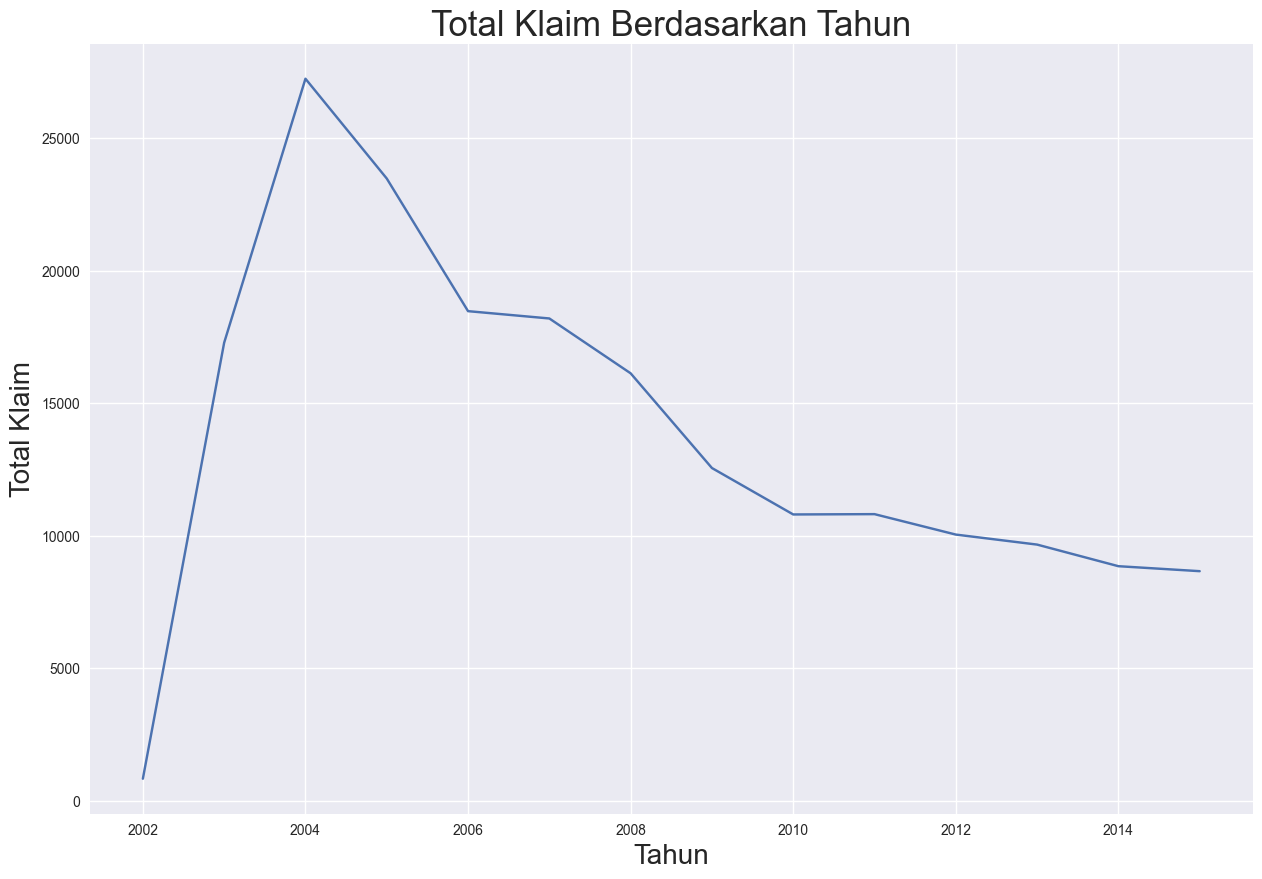

In [103]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.plot(claim_PerYear['Year'], claim_PerYear['Airport Code'])
plt.title('Total Klaim Berdasarkan Tahun', size=25)
plt.xlabel('Tahun', size=20)
plt.ylabel('Total Klaim',size=20)
plt.show()

Dari grafik terlihat bahwa memang klaim paling sedikit itu ada di tahun 2002, namun meningkat drastis pada tahun 2004, dan cenderung menurun setiap tahunnya sampai 2015

#### Jumlah Klaim yang Diterima Setiap Bandara (diatas Rata-rata)

In [104]:
claim_ByAirport = df.groupby('Airport Code')[['Claim Type']].count().reset_index()
claim_ByAirport.rename(columns={'Claim Type':'Total Claim'}, inplace=True)
claim_ByAirport

,Airport Code,Total Claim
0,-,421
1,ABE,127
2,ABI,44
3,ABQ,926
4,ABR,31
...,...,...
460,YKM,44
461,YNG,24
462,YUM,32
463,ZZX,249


In [105]:
claim_ByAirport.describe()

,Total Claim
count,465.000000
mean,415.238710
std,1159.785286
min,1.000000
25%,7.000000
50%,33.000000
75%,187.000000
max,9451.000000


<Axes: xlabel='Total Claim'>

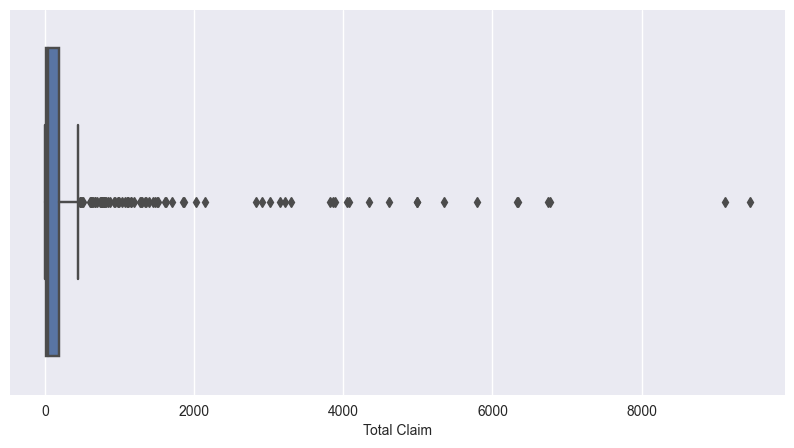

In [106]:
plt.figure(figsize=(10,5))
sns.boxplot(x=claim_ByAirport['Total Claim'])

In [107]:
q1 = 7.0
q3 = 187.0
IQR = q3-q1
batas_atas = q3 + (1.5*IQR)

claim_ByAirport[claim_ByAirport['Total Claim']> batas_atas]['Airport Code'].count()

78

In [108]:
# Uji Distribusi normal Total Claim menggunakan kstest

'''
*) If the P-Value is larger than 0.05, we assume a normal distribution
*) If the P-Value is smaller than 0.05, we do not assume a normal distribution
'''

from scipy.stats import kstest

print(kstest(claim_ByAirport['Total Claim'], 'norm'))

KstestResult(statistic=0.9105832013851541, pvalue=0.0, statistic_location=2, statistic_sign=-1)


Dari boxplot dan uji distribusi normal data di atas, dapat dilihat bahwa `Total Claim` tidak terdistribusi normal dan standar deviasi yang cukup besar dari total klaim yang diterima oleh tiap bandara. Hal ini dikarenakan banyaknya data outlier dan cukup besarnya nilai dari outlier tersebut. Terdapat 78 bandara yang termasuk ke dalam nilai outlier. Namun, kita tidak akan menghapus data ini karena fokus dari analisa ini lebih kepada bandara yang memiliki total klaim yang paling banyak diantara bandara lainnya. Hal itulah yang nantinya menjadikan bandara-bandara tersebut sebagai prioritas untuk segera ditindaklanjuti lebih jauh oleh TSA. Oleh karena itu kita akan menganalisa lebih jauh bandara-bandara mana saja yang masuk ke dalam nilai outlier tersebut.

In [109]:
a_airport = claim_ByAirport[claim_ByAirport['Total Claim']> batas_atas]
a_airport_mean = a_airport['Total Claim'].mean()

Di sini kita akan lebih lebih menfokuskan analisa kita kepada bandara yang memiliki total klaim di atas rata-rata (berdasarkan data outlier)

In [110]:
a_plot = a_airport[a_airport['Total Claim'] > a_airport_mean].sort_values('Total Claim', ascending=False)
a_plot

,Airport Code,Total Claim
246,LAX,9451
232,JFK,9122
138,EWR,6769
321,ORD,6738
288,MIA,6336
276,MCO,6323
28,ATL,5792
398,SEA,5344
339,PHX,4994
244,LAS,4991


In [111]:
a_plot.describe()

,Total Claim
count,23.000000
mean,4910.391304
std,1856.291801
min,2831.000000
25%,3561.500000
50%,4344.000000
75%,6057.500000
max,9451.000000


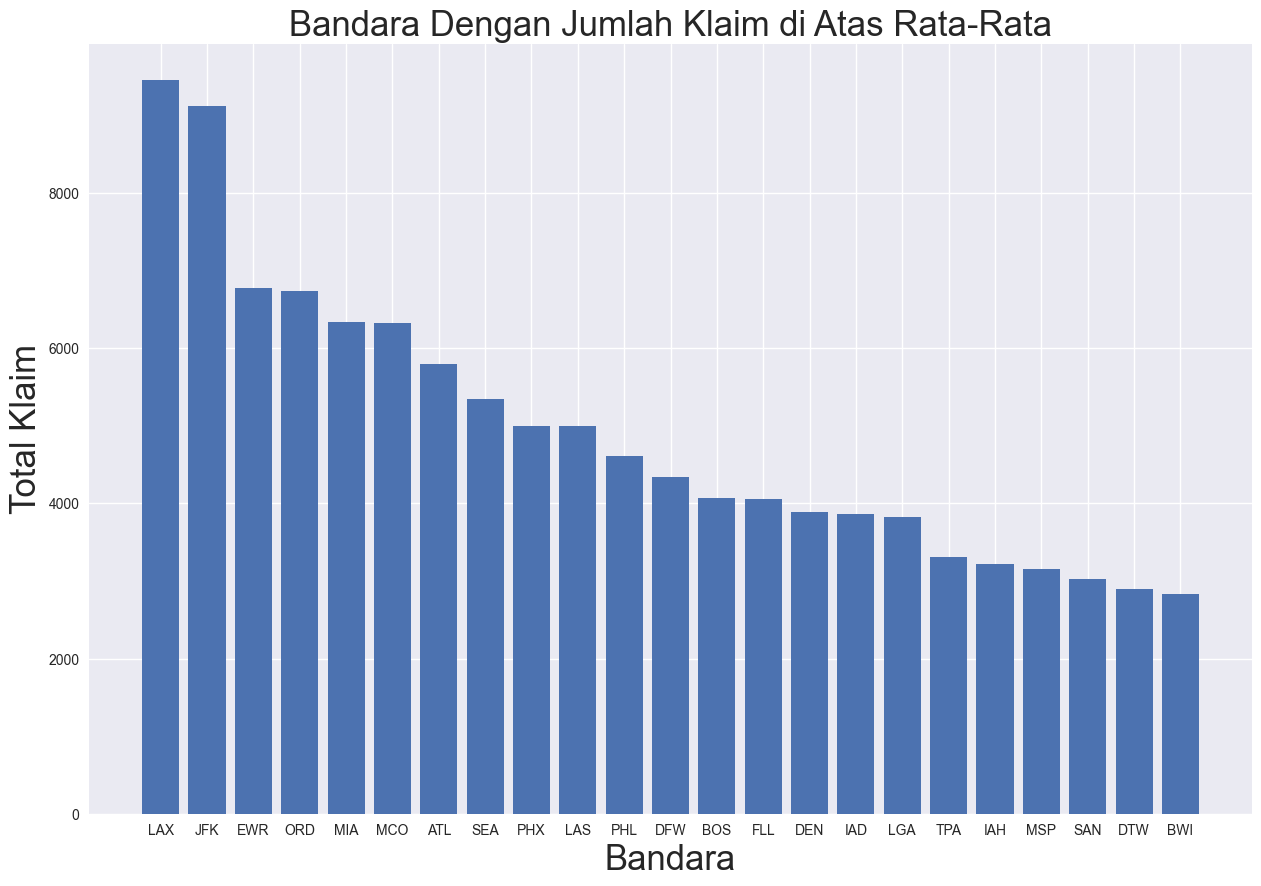

In [112]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.title('Bandara Dengan Jumlah Klaim di Atas Rata-Rata', size=25) 
plt.bar(a_plot['Airport Code'], a_plot['Total Claim'])
plt.xlabel('Bandara', size=25)
plt.ylabel('Total Klaim', size=25)
plt.show()

Dari grafik di atas dilihat bandara dengan total klaim di atas rata-rata (berdasarkan bandara yang termasuk ke dalam outlier). Tiga tertinggi diantara bandara tersebut masing-masing adalah LAX (9.451 klaim), JFK (9.122 klaim), dan EWR (6.769 klaim). Berdasarkan data yang dilansir dari [wikipedia](https://id.wikipedia.org/wiki/Bandar_udara_tersibuk_di_Amerika_Serikat_menurut_lalu_lintas_penumpang_internasional), diketahui bahwa mayoritas dari bandara-bandara yang masuk ke dalam grafik di atas juga termasuk ke dalam bandara-bandara tersibuk di Amerika Serikat.

Maka tidak heran bila kemungkinan terjadinya pengajuan klaim di bandara-bandara tersebut lebih tinggi, dikarenakan tingginya arus lalu lintas penumpang dan cukup tingginya beban kerja yang harus dilaksanakan oleh TSA.

In [113]:
df['Claim Type'].value_counts()/df.shape[0]*100

Passenger Property Loss    58.924003
Property Damage            36.727676
Other                      2.929265 
Personal Injury            0.739049 
Employee Loss (MPCECA)     0.242897 
Passenger Theft            0.230985 
Motor Vehicle              0.177641 
Complaint                  0.024341 
Wrongful Death             0.002072 
Compliment                 0.001554 
Bus Terminal               0.000518 
Name: Claim Type, dtype: float64

In [114]:
claimType = df.groupby('Claim Type', as_index=False)['Claim Type'].value_counts()
claimType

,Claim Type,count
0,Bus Terminal,1
1,Complaint,47
2,Compliment,3
3,Employee Loss (MPCECA),469
4,Motor Vehicle,343
5,Other,5656
6,Passenger Property Loss,113774
7,Passenger Theft,446
8,Personal Injury,1427
9,Property Damage,70916


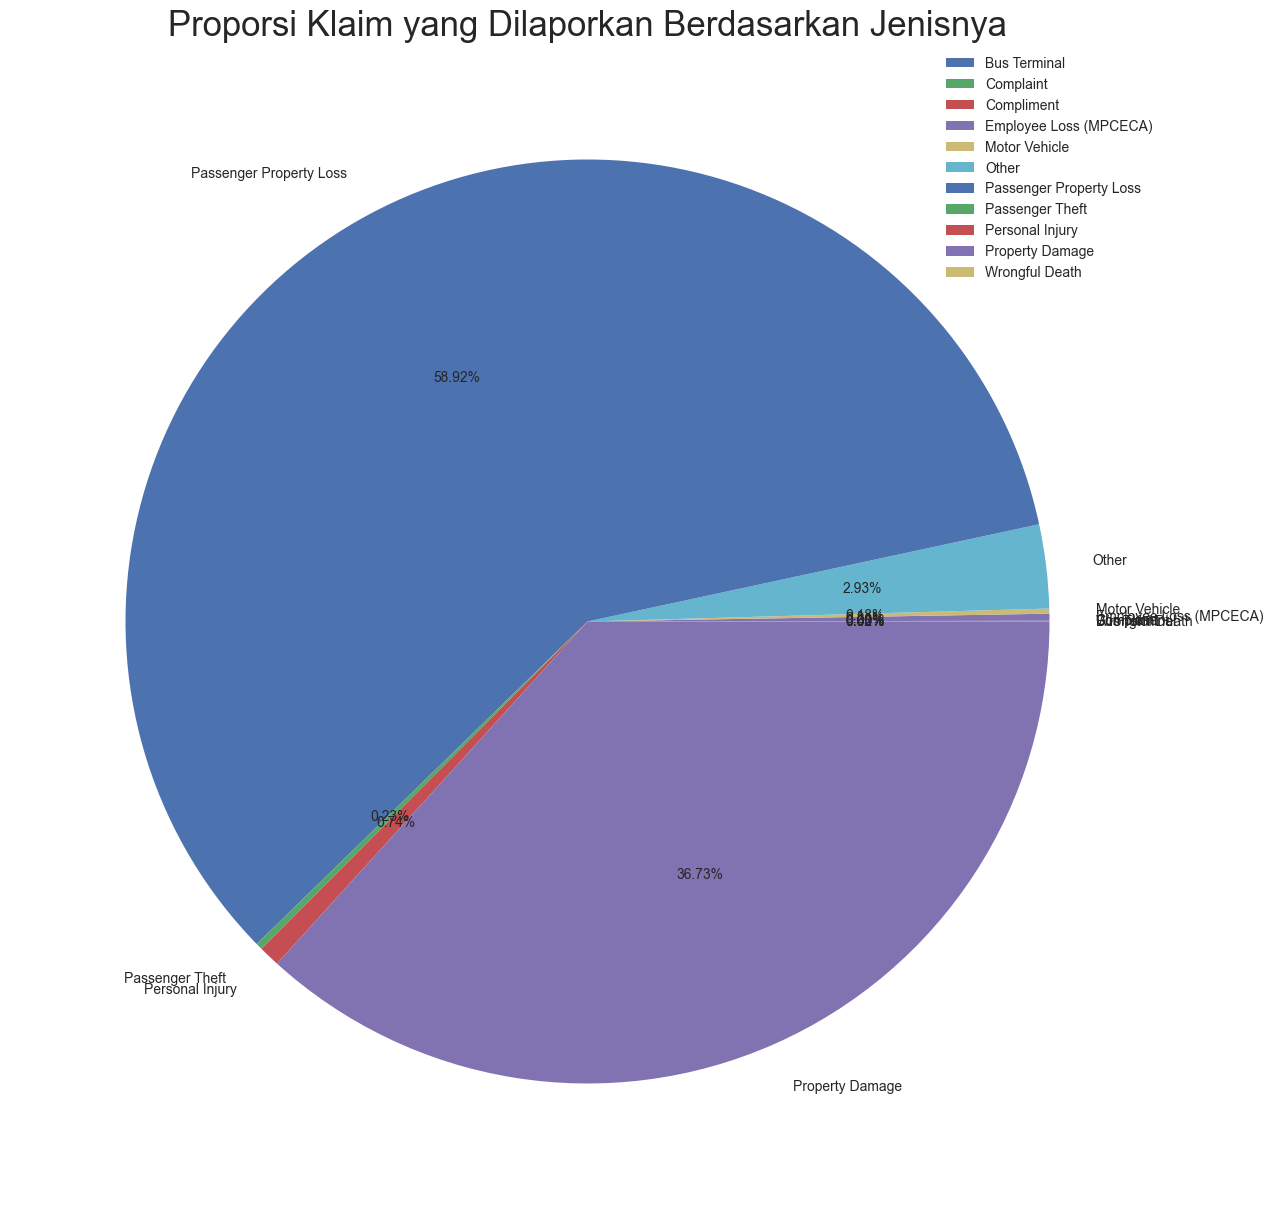

In [115]:
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.title('Proporsi Klaim yang Dilaporkan Berdasarkan Jenisnya', size=25) 
plt.pie(claimType['count'],labels=claimType['Claim Type'], autopct='%.2f%%')
plt.legend()
plt.show()

In [116]:
df['Claim Site'].value_counts()/df.shape[0]*100

Checked Baggage    78.961188
Checkpoint         19.799468
Other              1.004734 
Motor Vehicle      0.226842 
Bus Station        0.007769 
Name: Claim Site, dtype: float64

In [117]:
claimSite = df.groupby('Claim Site', as_index=False)['Claim Site'].value_counts()
claimSite

,Claim Site,count
0,Bus Station,15
1,Checked Baggage,152463
2,Checkpoint,38230
3,Motor Vehicle,438
4,Other,1940


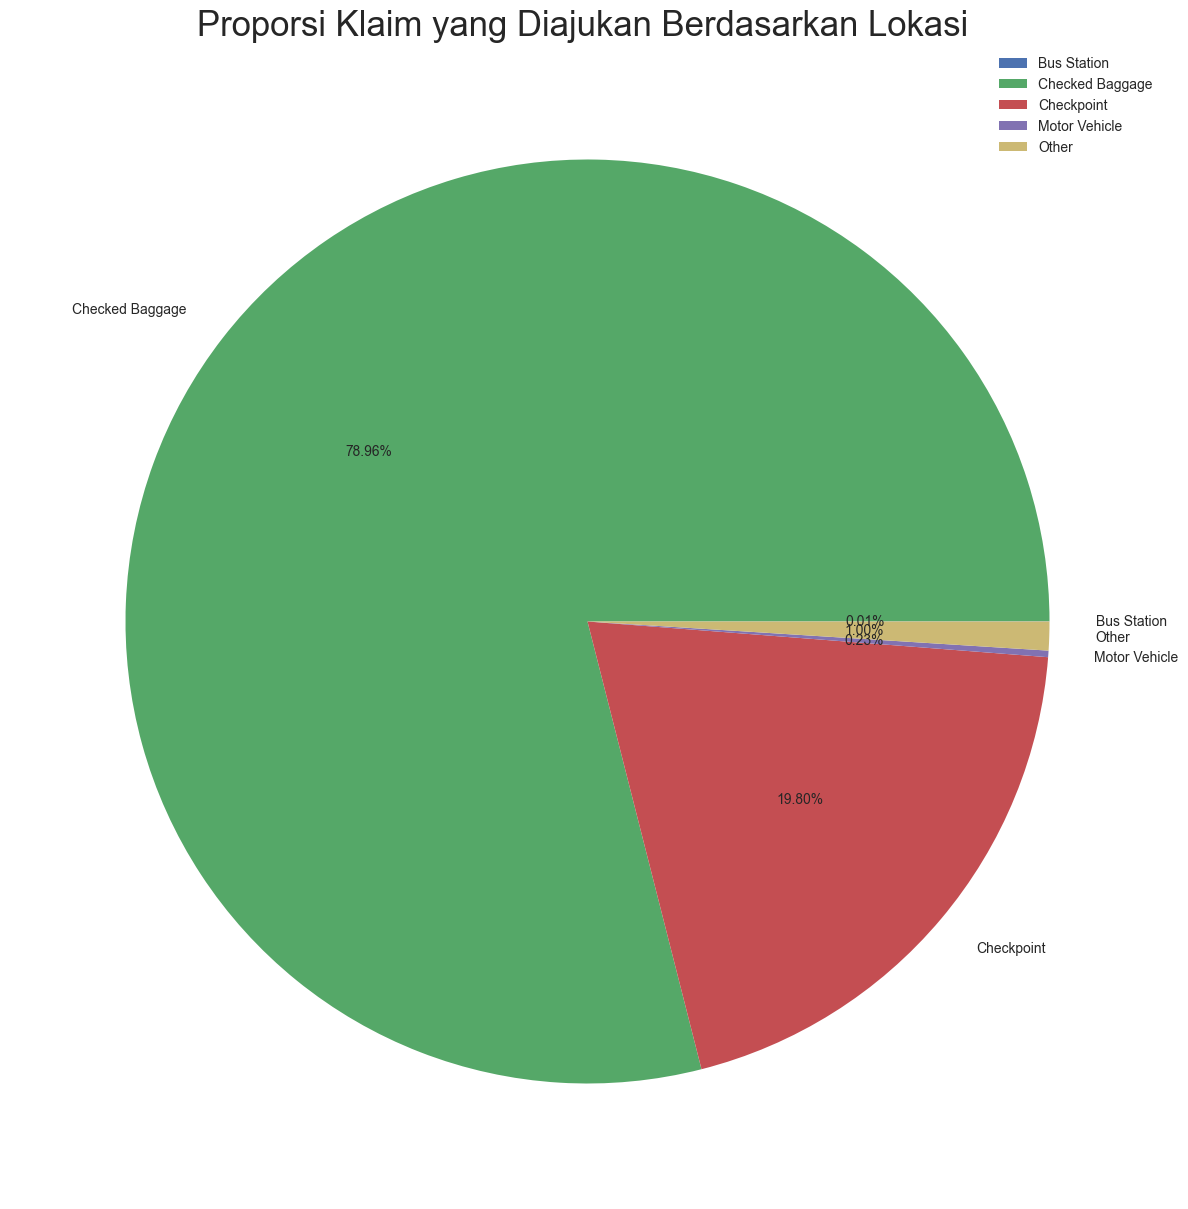

In [118]:
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.title('Proporsi Klaim yang Diajukan Berdasarkan Lokasi ', size=25) 
plt.pie(claimSite['count'], labels=claimSite['Claim Site'], autopct='%.2f%%')
plt.legend()
plt.show()

Dari dua pie plot yang sudah kita buat terlihat bahwa mayoritas tipe klaim yang diajukan kepada TSA berupa *Passenger Property Loss* dan *Property Damage, masing-masing sebesar 58,9%* dan 36,7%. Data ini mengindikasikan bahwa kebanyakkan klaim yang diajukan kepada TSA berhubungan dengan barang-barang yang dibawa oleh penumpang yang hilang ataupun rusak. Dengan mayoritas lokasi titik pengaduan klaim berada di *Checked Baggage* dan *Checkpoint, masing-masing sebesar 78,9%* dan 19,8%. 

Dari proporsi tersebut kita dapat menarik kesimpulan bahwa tingginya proporsi pengaduan klaim di titik *Checked Baggage* (Pengecekkan Bagasi) dan *Checkpoint* (Tempat pemeriksaan penumpang di bandara) disebabkan karena dua lokasi tersebut merupakan titik dengan tingkat aktivitas dan tingkat kepadatan yang cukup tinggi di sebuah bandara.

#### Proporsi Jumlah Tipe Klaim berdasarkan Bandara

In [119]:
# 10 Bandara dengan jumlah pengajuan klaim terbanyak, berdasarkan Claim Type

df_ClaimType=pd.crosstab(df['Airport Code'],df['Claim Type'])
df_ClaimType['Total']=df_ClaimType.sum(axis=1)
top10Airportct = df_ClaimType.sort_values('Total',ascending=False).head(10)

In [120]:
top10Airportct

Claim Type,Bus Terminal,Complaint,Compliment,Employee Loss (MPCECA),Motor Vehicle,Other,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Wrongful Death,Total
Airport Code,,,,,,,,,,,,
LAX,0,2,0,21,9,366,5738,24,64,3227,0,9451
JFK,0,2,0,13,9,210,6272,17,52,2547,0,9122
EWR,0,2,0,20,5,200,4260,15,36,2231,0,6769
ORD,0,0,0,24,6,202,3636,20,33,2817,0,6738
MIA,0,1,0,19,6,220,3889,13,36,2152,0,6336
MCO,0,2,0,14,4,183,4013,12,51,2044,0,6323
ATL,0,1,0,9,3,132,3530,16,44,2057,0,5792
SEA,0,1,0,16,0,178,3093,19,26,2011,0,5344
PHX,0,4,0,11,0,155,2913,14,48,1849,0,4994


In [121]:
top10Airportct.describe()

Claim Type,Bus Terminal,Complaint,Compliment,Employee Loss (MPCECA),Motor Vehicle,Other,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Wrongful Death,Total
count,10.0,10.00000,10.0,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.0,10.000000
mean,0.0,1.70000,0.0,15.700000,4.400000,197.800000,4050.600000,16.50000,43.800000,2255.500000,0.0,6586.000000
std,0.0,1.05935,0.0,5.121849,3.238655,66.714649,1120.365635,3.62859,11.143508,479.397365,0.0,1566.286195
min,0.0,0.00000,0.0,9.000000,0.000000,132.000000,2913.000000,12.00000,26.000000,1620.000000,0.0,4991.000000
25%,0.0,1.00000,0.0,11.500000,2.250000,160.750000,3254.000000,14.25000,36.000000,2019.250000,0.0,5456.000000
50%,0.0,2.00000,0.0,15.000000,4.500000,191.500000,3762.500000,15.50000,46.000000,2104.500000,0.0,6329.500000
75%,0.0,2.00000,0.0,19.750000,6.000000,208.000000,4198.250000,18.50000,50.250000,2468.000000,0.0,6761.250000
max,0.0,4.00000,0.0,24.000000,9.000000,366.000000,6272.000000,24.00000,64.000000,3227.000000,0.0,9451.000000


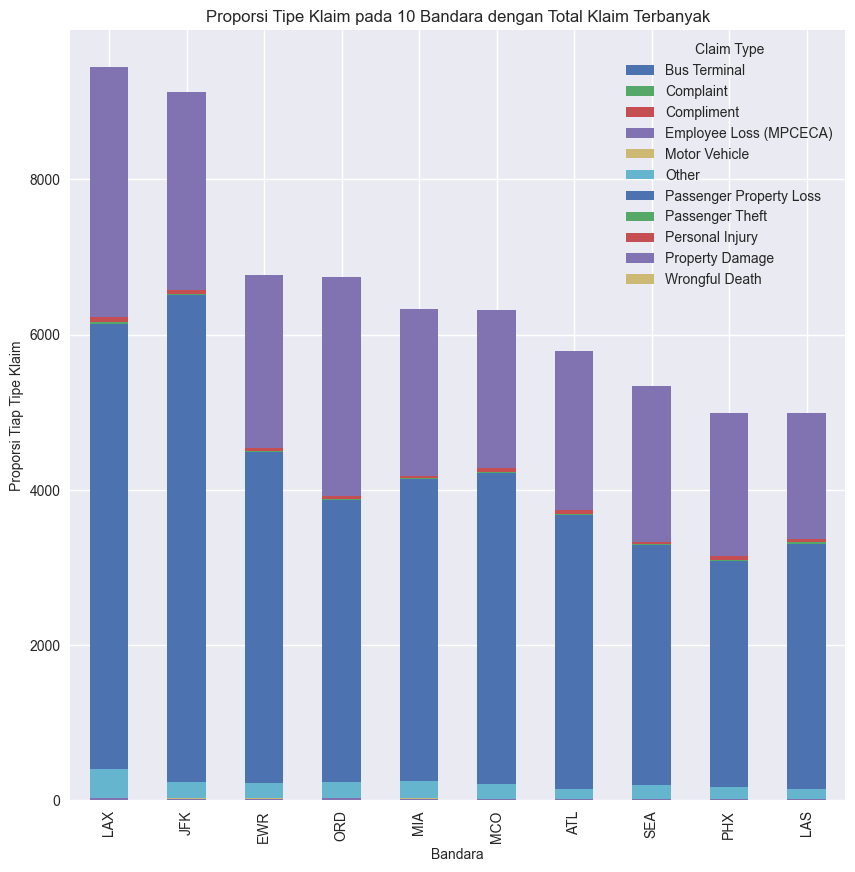

In [122]:
top10Airportct.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(10,10), title='Proporsi Tipe Klaim pada 10 Bandara dengan Total Klaim Terbanyak', xlabel='Bandara', ylabel='Proporsi Tiap Tipe Klaim')
plt.show()

Seperti dengan informasi yang kita dapat dari Pie chart sebelumnya mengenai tipe klaim yang paling banyak diajukan berdasarkan lokasi kehilangan di bandara. Pada bar chart diatas juga memperlihatkan tipe klaim **Passenger Property Loss** dan **Property Damage** juga menjadi tipe klaim dengan proporsi yang paling banyak berdasarkan 10 bandara dengan total klaim terbanyak.

#### Proporsi Jumlah Lokasi Klaim berdasarkan Bandara

In [123]:
# 10 Bandara dengan jumlah pengajuan klaim terbanyak, berdasarkan Claim Site

df_ClaimSite=pd.crosstab(df['Airport Code'],df['Claim Site'])
df_ClaimSite['Total']=df_ClaimSite.sum(axis=1)
top10Airportcs = df_ClaimSite.sort_values('Total',ascending=False).head(10)

In [124]:
top10Airportcs

Claim Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other,Total
Airport Code,,,,,,
LAX,1,7180,2153,8,109,9451
JFK,2,7138,1882,9,91,9122
EWR,2,5548,1138,7,74,6769
ORD,1,5315,1336,8,78,6738
MIA,0,5319,960,5,52,6336
MCO,0,4957,1309,3,54,6323
ATL,1,4454,1287,2,48,5792
SEA,0,4310,991,2,41,5344
PHX,0,4107,843,0,44,4994


In [125]:
top10Airportcs.describe()

Claim Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other,Total
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,0.700000,5224.900000,1291.900000,4.400000,64.10000,6586.000000
std,0.823273,1157.424771,420.554779,3.438346,22.79108,1566.286195
min,0.000000,3921.000000,843.000000,0.000000,41.00000,4991.000000
25%,0.000000,4346.000000,998.250000,2.000000,48.50000,5456.000000
50%,0.500000,5136.000000,1212.500000,4.000000,53.00000,6329.500000
75%,1.000000,5490.750000,1329.250000,7.750000,77.00000,6761.250000
max,2.000000,7180.000000,2153.000000,9.000000,109.00000,9451.000000


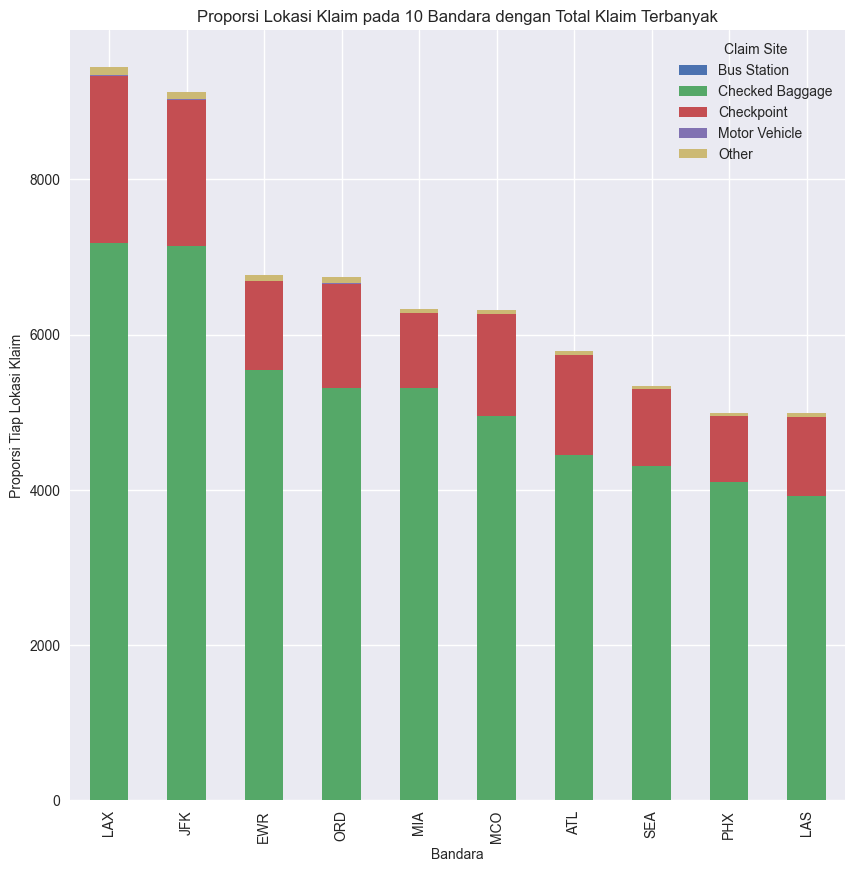

In [126]:
top10Airportcs.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(10,10), title='Proporsi Lokasi Klaim pada 10 Bandara dengan Total Klaim Terbanyak', xlabel='Bandara', ylabel='Proporsi Tiap Lokasi Klaim')
plt.show()

Sama seperti sebelumnya lokasi klaim **Checked Baggage** dan **Checkpoint** merupakan lokasi klaim dengan proporsi terbanyak di 10 Bandara dengan total klaim terbanyak.

Namun ada hal penting yang perlu diperhatikan mengenai **Checked Baggage** (pemeriksaan bagasi), karena selain dilakukan oleh TSA pemeriksaan bagasi juga dilakukan oleh tiap maskapai penerbangan. Oleh karena itu kita perlu mengecek Maskapai dengan laporan **Checked Baggage** yang cukup tinggi.

#### Total Klaim *Checked Baggage* berdasarkan Maskapai

In [127]:
# 10 Maskapai dengan klaim Checked Baggage terbanyak

df_airlines=pd.crosstab(df['Airline Name'],df['Claim Site'])
df_airlines.sort_values('Checked Baggage',ascending=False)

Claim Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other
Airline Name,,,,,
DeltaAirLines,1,20595,4610,0,170
Undisclosed,0,19688,10419,432,872
AmericanAirlines,1,19532,3931,0,139
UAL,4,16223,3037,1,156
SouthwestAirlines,3,15995,4102,0,121
...,...,...,...,...,...
ViequesAir,0,0,1,0,0
EstoniaAir,0,0,1,0,0
ArikaIsrealiAirlines,0,0,1,0,1


In [128]:
df_airlines.drop(columns=['Bus Station', 'Checkpoint', 'Motor Vehicle', 'Other'], inplace=True)

In [129]:
df_airlines.describe()

Claim Site,Checked Baggage
count,224.000000
mean,680.638393
std,2960.688517
min,0.000000
25%,3.000000
50%,11.000000
75%,66.000000
max,20595.000000


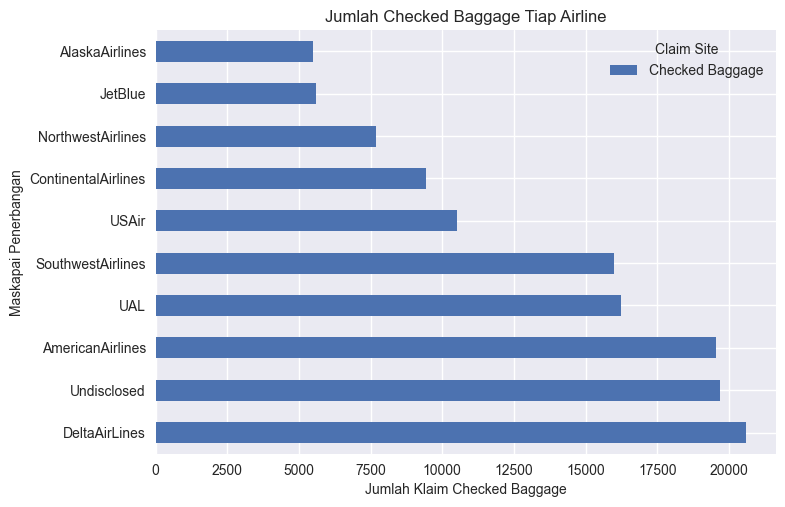

In [130]:
airlines_plot = df_airlines.sort_values('Checked Baggage', ascending=False).head(10)
airlines_plot.plot(kind='barh', title='Jumlah Checked Baggage Tiap Airline', xlabel='Jumlah Klaim Checked Baggage', ylabel='Maskapai Penerbangan')
plt.show()

Berdasarkan informasi dari [YouGovAmerica](https://today.yougov.com/ratings/travel/popularity/airlines/all), menunjukkan bahwa memang hampir seluruh maskapai diatas masuk kedalam daftar maskapai dengan popularitas yang tinggi di AS.

Sehingga bisa disimpulkan tingginya klaim berdasarkan **Checked Baggage** bisa juga disebabkan karena kelalaian dari pihak Maskapai penerbangan itu sendiri dan belum tentu kelalaian itu dari pihak TSA

### Kesimpulan dan Rekomendasi

#### Kesimpulan

Dari analisis yang telah dilakukan, dapat ditarik kesimpulan mengenai **Bagaimana karakteristik data pengajuan klaim yang dibuat oleh penumpang ke pihak TSA dari tahun 2002-2015**. Adapun kesimpulannya :

1. Klaim terendah terjadi pada tahun 2002, dan terus mengalami peningkatan hingga tahun 2004, dan cenderung menurun pada tahun-tahun berikutnya.

2. Bandara LAX (Los Angeles International Airport) menjadi bandara dengan total klaim terbanyak, diikuti dengan bandara JFK (John F. Kennedy International Airport) dan bandara EWR (Newark Liberty International Airport).

3. Bandara-bandara yang memiliki klaim yang tinggi, termasuk list bandara tersibuk di Amerika Serikat.

4. Tipe klaim *Passenger Property Loss* dan *Property Damage* merupakan tipe klaim dengan proporsi terbanyak. Yang jika dicek berdasarkan jumlah tipe klaim tiap bandara juga memilki proporsi yang tinggi

5. Lokasi klaim *Checked Baggage* dan *Checkpoint* juga menjadi lokasi dengan proporsi terbanyak. Hal ini karena lokasi tersebut memang merupakan lokasi dengan aktivitas dan kepadatan yang paling tinggi di setiap bandara. Namun perlu diketahui bahwa untuk *Checked Baggage* juga dilakukan oleh Maskapai Penerbangan, sehingga pengajuan klaim berdasarkan lokasi Maskapai juga menjadi hal yang patut dipertimbangkan.

6. Maskapai yang masuk dalam jumlah klaim *Checked Baggage* terbanyak juga merupakan maskapai yang populer di Amerika Serikat.

#### Rekomendasi

Berdasarkan kesimpulan yang telah dibuat saya merekomendasikan beberapa hal berikut :

1. TSA perlu menambah petugas keamanan di bandara-bandara dengan tingkat aktivitas yang tinggi di Amerika Serikat

2. Berdasarkan lokasinya TSA perlu menambah petugas di area Checked Baggage dan Checkpoint di setiap bandara.

3. TSA perlu melakukan kerjasama dengan Maskapai Penerbangan untuk meminimalisir kehilangan atau kerusakan barang dari penumpang